In [3]:
import matplotlib.pyplot as plt
import matplotlib
import json_tricks as json
import pandas as pd

In [4]:
results_path = "../../experiments/results/"

In [5]:
# set up exporting
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'pgf.rcfonts': False,
#     'axes.unicode_minus': False, # avoid unicode error on saving plots with negative numbers (??)
# })

# figure_path = "/home/lauro/documents/msc-thesis/thesis/figures/"
figure_path = "/home/lauro/documents/msc-thesis/paper/latex/figures/"
printsize_singlecolumn = [3.6, 3]
pdf_printsize = [5, 4]
# save figures by using plt.savefig('title of figure')
# remember that latex textwidth is 5.4in
# so use figsize=[5.4, 4], for example

# SD maxing

In [6]:
results = json.load(results_path + "sd_maxing.json")

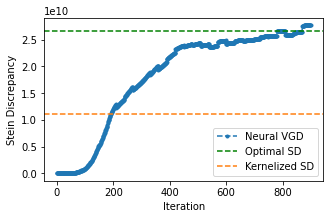

In [7]:
# PDF
%matplotlib inline
plt.subplots(figsize=[5, 3])

plt.plot(results['Neural_SD'], "--.", label="Neural VGD")
plt.axhline(results['Optimal_SD'], linestyle="--", color="green", label="Optimal SD")
plt.axhline(results['KSD'], linestyle="--", color="tab:orange", label="Kernelized SD")

plt.ylabel("Stein Discrepancy")
plt.xlabel("Iteration")
plt.legend()
# plt.yscale("log")
plt.savefig(figure_path + "sd_maxing.pdf")

# Funnel MMD

In [8]:
results = json.load(results_path + "funnel-mmd-comparison.json")

In [9]:
results

OrderedDict([('Neural', [[0.0, 0.05210918188095093]]),
             ('SGLD', [[0.0, 0.05618637800216675]]),
             ('SGLD2', [[0.0, 0.05618637800216675]]),
             ('SVGD', [[0.0, 0.05618637800216675]])])

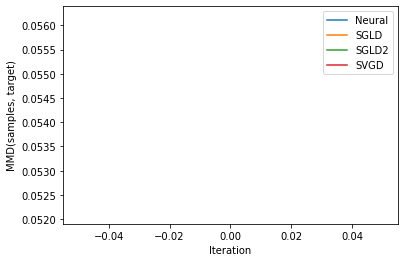

In [11]:
%matplotlib inline
plt.subplots(figsize=[6, 4])

typ = "funnel_"

for k, v in results.items():
    plt.plot(*zip(*v), label=k)

# plt.plot(*zip(*neural_particles.rundata[typ+"mmd"]), label="Neural gradient flow")
# plt.plot(*zip(*sgld_particles.rundata[typ+"mmd"]), label="Langevin")
# plt.plot(*zip(*sgld_particles2.rundata[typ+"mmd"]), label="Langevin (reduced step-size)")
# plt.plot(*zip(*svgd_particles.rundata[typ+"mmd"]), label="SVGD")


plt.xlabel("Iteration")
plt.ylabel("MMD(samples, target)")

plt.legend()

# Funnel dimension sweep

In [4]:
results = json.load(results_path + "funnel-dimension-sweep.json")

In [8]:
# %matplotlib inline
# plt.subplots(figsize=[10, 5])

# for name, mmds in results.items():
#     plt.plot(mmds, "--.", label=name)

# plt.ylabel("MMD(samples, target)")
# plt.xlabel("Dimensionality of sample space")
# plt.legend()
# # plt.yscale("log")

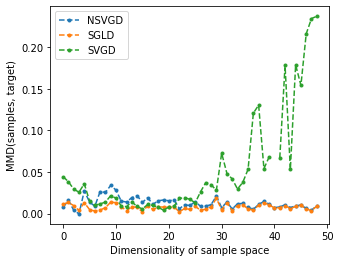

In [11]:
# PDF
%matplotlib inline
plt.subplots(figsize=pdf_printsize)

for name, mmds in results.items():
    plt.plot(mmds, "--.", label=name)

plt.ylabel("MMD(samples, target)")
plt.xlabel("Dimensionality of sample space")
plt.legend()
# plt.yscale("log")
plt.savefig(figure_path + "funnel-dimension-sweep.pdf")

# Funnel scatterplot

In [4]:
results = ??

# Bayesian logistic regression

In [4]:
results = json.load(results_path + "covertype-regression.json")

In [ ]:
# copied from nb
%matplotlib inline
plt.subplots(figsize=[15, 8])
names = ["SGLD", "SVGD", "NGF"]
for name, accuracy in zip(names, (sgld_final, svgd_final, ngf_final)):
    plt.plot(spaced_grid, accuracy, "--.", label=name)

plt.ylabel("Test accuracy")
plt.xlabel("Step")
plt.legend()

# Bayesian neural network

In [13]:
# sgld_results = pd.read_csv(results_path + "bnn-langevin.csv")
# # nsvgd_results = pd.read_csv(results_path + "bnn-nsvgd.csv")

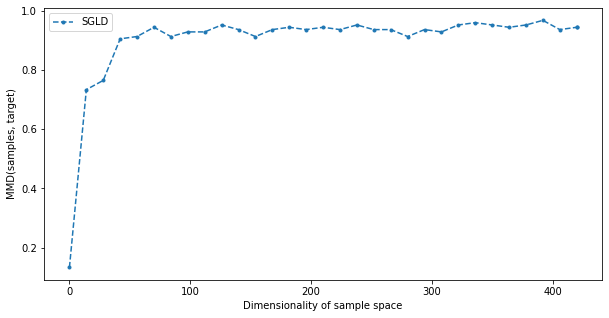

In [12]:
plt.subplots(figsize=[10, 5])

plt.plot(sgld_results.step,  sgld_results.accuracy, "--.", label="SGLD")
# plt.plot(nsvgd_results.step, nsvgd_results.accuracy, "--.", label="NSVGD")

plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.legend()
# plt.yscale("log")